<a id='top'></a>

# CSCI3022 S21
# Homework 5: Testing and Confidence
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [15 points] Problem 1 - Time and Testing 

The flowers bloomed early this year in Kyoto, Japan (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

    year   FuFD
0    801    NaN
1    802    NaN
2    803    NaN
3    804    NaN
4    805    NaN
5    806    NaN
6    807    NaN
7    808    NaN
8    809    NaN
9    810    NaN
10   811    NaN
11   812   92.0
12   813    NaN
13   814    NaN
14   815  105.0
15   816    NaN
16   817    NaN
17   818    NaN
18   819    NaN
19   820    NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F96E125EF0>]],
      dtype=object)

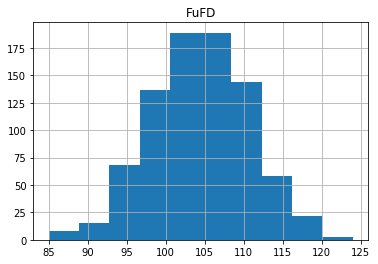

In [2]:
df=pd.read_csv('../data/kyotoflowers.csv', encoding='UTF-8')
df.columns=['year','FuFD']
print(df.head(20))
df.hist('FuFD')

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

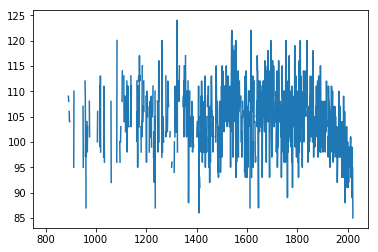

In [3]:
plt.plot(df['year'], df['FuFD'])

**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [4]:
df.describe()

,year,FuFD
count,1221.000000,833.000000
mean,1411.000000,104.453782
std,352.616647,6.476146
min,801.000000,85.000000
25%,1106.000000,100.000000
50%,1411.000000,104.000000
75%,1716.000000,109.000000
max,2021.000000,124.000000


**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?  One way to do this might be to generate confidence intervals comparing e.g. the last $n$ years of data to all the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of take, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior all-observed years.

Write a sentence interpreting this result.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in any variance/confidence/etc. calculations.

In [5]:
dfNow = df.copy()
dfNow = dfNow.loc[(dfNow["year"]>=2011), "FuFD"]
dfPast = df.copy()
dfPast=dfPast.loc[(dfPast["year"]<2011), "FuFD"]
dfPast=dfPast.dropna()

Nowmean=np.mean(dfNow)
Pastmean=np.mean(dfPast)
NowVar=np.var(dfNow, ddof=1)
PastVar=np.var(dfPast, ddof=1)
n=len(dfNow)
m=len(dfPast)

print('Present mean',Nowmean, 'looks a lot earlier than prior years mean:', Pastmean)

meanDiff=Nowmean-Pastmean
pooledSE=np.sqrt(PastVar/len(dfPast)+NowVar/len(dfNow))

tdof=(NowVar/n + PastVar/m)**2/\
((NowVar/n)**2/(n-1)+(PastVar/m)**2/(m-1))
tcrit=stats.t.ppf(0.995, df=tdof)
print('t-Conf. Interval for the difference is:', meanDiff-tcrit*pooledSE,meanDiff+tcrit*pooledSE)
tstat=meanDiff/pooledSE
print('t-based test (hypothesis test):', tstat, 'is less than rejection region cutoff of:', stats.t.ppf(0.01, df=tdof))

Present mean 94.0909090909091 looks a lot earlier than prior years mean: 104.59245742092457
t-Conf. Interval for the difference is: -14.917986032234092 -6.085110627796871
t-based test (hypothesis test): -7.453431047233748 is less than rejection region cutoff of: -2.738800057843744


**Solution**: What do we think?  Using a confidence interval, we get an interval that runs from around (-14.9, -6.1), or the recent years seem to be at least 6-14 days earlier than the rest of the data!

Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

**Solution**: It's a pretty reasonable test to compare recent years to more modern ones.  That said, we're using a pretty small sample for recent years, here!  We could also consider a linear regression to track the change in date per year... but we haven't covered those, yet!

**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years in the data set, starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of every starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1629 to 2010-2021 contains zero, then print `1618`.  Report:
- The earliest date of such an interval contianing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [6]:
# **Solution**:

# helper function to compute CIs:
def ci_flowers(year_begin, length_years, dfNow, alp):
    dfThen = df.copy()
    dfThen = dfThen.loc[(dfThen["year"]>=year_begin) & (dfThen["year"]<=(year_begin+length_years-1)), "FuFD"]
    dfThen=dfThen.dropna()
    
    m=len(dfThen)
    ThenVar=np.var(dfThen, ddof=1)
    meanDiff=Nowmean-np.mean(dfThen)
    pooledSE=np.sqrt(ThenVar/m+NowVar/n)

    tdof=(NowVar/n + ThenVar/m)**2/\
    ((NowVar/n)**2/(n-1)+(ThenVar/m)**2/(m-1))

    tcrit= stats.t.ppf(1-alp/2, tdof)
    
    lb = meanDiff - tcrit*pooledSE
    ub = meanDiff + tcrit*pooledSE
    if ub>0: print(year_begin)
    return lb, ub

dfNow = df.copy()
dfNow = dfNow.loc[(dfNow["year"]>=2010), "FuFD"]
CIs=[[begy, ci_flowers(begy, 12, dfNow, 0.01)] for begy in range(1600,2011)]

1601
1625
1950
1951
1953
1955
1956
1957
1958
1966
1971
1972
1973
1976
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


**Solution**:

If we were trying to be shifty, we could make statements like:


"Flowering dates did not appear to be significantly earlier when we compare 2010-2021 to the years 1600-1611" 

or


"Flowering dates did not appear to be significantly earlier when we compare 2010-2021 to the years 1650-1661."

Of course, we had to run over 400 tests to find those intervals, and with an alpha of 0.01 we shouldn't be too surprised to find a couple of those 400 that might have contradicted the overall flow of the data!

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [15 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (5 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


**Sol**

Scientists misuse p values by treating their studies as if a small p value (below $\alpha$) means that
the null hypothesis is very unlikely to be true. This is a misinterpretation. If p values fall below
the standard 0.05, this just means that the evidence in the sample is unlikely under the null
hypothesis. But, unlikely evidence doesn't mean the null is false!
Pros of changing the p values include that it would make a stronger threshold for a null hypothesis
to be rejected (i.e., the type I error rate would be lower); this would decrease the prevalence of false
research findings. One drawback to this method is that the rate of type II error would increase,
so researchers might overlook true findings.
Suggestions to use them properly include giving scientists more training in statistics so they know
how not to use unbiased methods and hwo to interpret their results.

#### 2B  (2 pts):
In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?   Use **plain English**.

**Solution:** Certainly the 99% confidence interval is wider, since we're more scared of being wrong!  Generally, we think of the confidence interval as a little window over our random mean, and we try to make sure that the window is likely to actually cover the value we want: a bigger window is more likely to hold that value, so we're more **confident** in wider windows.


#### 2C (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

**Solution:** We like our airplanes to not fall out of the sky.  Here the alternative is "unsafe," we we want to make sure that if the *alternative* is true, we never make the wrong choice.  

Type I error is the probability of accepting the alternative (rejecting the null) when the null was true... that's fine: this represents deciding that possibly acceptable parts weren't good enough.  But at least we didn't put them on a plane!

Type II error is the probability of rejecting the alternative when the alternative was true, which means deciding that parts were good enough when they in reality were not... so we put them on planes.  We don't want that!  We should minimize this error.


#### 2D (2pts):

Let $X_1, X_2, \dots X_n$ be independent and identically distributed sample from a normal random variable $N(\mu,1)$.


As you've seen, A 95% confidence interval for $\mu$ is $\bar{x} \pm 1.96 \cdot \frac{1}{\sqrt{n}}$.

Let $p$ denote the probability that an *additional* (or new) independent observation falls within this confidence interval. Is $p$ greater than, less than, or equal to 0.95? Justify your answer with both intuition and a formal mathematical statement.

**Solution:**
    
A confidence interval is a statement about a *mean*.  It is always narrower and more precise than the generic range of values that a member of the population takes, since the *mean* encompasses information about multiple people (at least, if $n>1$.).

Formally: the interval has radius of $z_{crit}*\frac{1^2}{n}$.  A "confidence interval" for a new observation would just me to take the mean and note that 95\% of observations fall within a radius of $z_{crit}*1^2$ of that mean, which is wider if $n\geq 1$.  If $n=1$, we could note that the interval is centered at $\mu$ for a member of the population in reality, but the interval is going to be centered at $\bar{X}$ for a sample.  This will necessarily not contain more probability that the one centered at $\mu$, since the normal distribution is symmatric (moving the center of interval to the left or right of $\mu$ will decrease the associated probability.)

#### 2E (2pts):
Suppose that 14 people in a sample of 91 are found to be smokers. Calculate the 90% confidence interval
for the *true* proportion of smokers in the population from which this sample originated. Interpret this interval in a plain English sentence.

In [20]:
print('CI is:', [14/91 + pm * np.sqrt((14/91*77/91)/91) for pm in [-1,1]])

CI is: [0.11602390985427373, 0.19166839783803397]


**Solution**: We are 90\% confident that for the overall population from which we sampled, between 11.6% and 19.2% of the people are smokers.

#### 2F (2pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7400
meters. Inspecting their study and the descriptions of their 64 measurements, it is reasonable to assume that the data were iid.  Their measurements contained sample statistics in $\mu s$ (or $\frac{sec}{10^6}$) of **mean** $\bar{X}=27.75$ and **standard deviation** of $s = 5.08.$


Construct an approximate 95\% confidence interval for the time light takes to travel 7400 meters.

In [21]:
xbar=27.75
s=5.08
n=64
print('CI is:', [xbar + pm * stats.norm.ppf(.975)*s**2/64 for pm in [-1,1]])

CI is: [26.959693522333836, 28.540306477666164]


---

<a id='p3'></a>
[Back to top](#top)

### [15 points] Problem 3 - Nap time?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [9]:

alp = 0.025

# coffee-nap condition
xbar, s, n = 451.3, 31.9, 15
CI_cofnap = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

# coffee condition
xbar, s, n = 494.2, 39.6, 15
CI_cof = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

# nap condition
xbar, s, n = 492.8, 45.2, 15
CI_nap = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

print("Coffee-nap CI = [{:0.3f}, {:0.3f}]".format(CI_cofnap[0], CI_cofnap[1]))
print("    Coffee CI = [{:0.3f}, {:0.3f}]".format(CI_cof[0], CI_cof[1]))
print("       Nap CI = [{:0.3f}, {:0.3f}]".format(CI_nap[0], CI_nap[1]))

Coffee-nap CI = [430.630, 471.970]
    Coffee CI = [468.540, 519.860]
       Nap CI = [463.512, 522.088]


The confidence intervals are overlapping... which means nothing!  Instead, we need to test for the difference in means.  We use a t here since the sample sizes aren't big enough for normals!

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Solution**:

We will perform a hypothesis test for the difference between the means.  Since the sample sizes are small and the mean reaction times are known to be normally distributed, we will use a t-test.  Our hypotheses are 

$$
\begin{array}{ll}
H_0 & \mu_N - \mu_C = 0 \\
H_1 & \mu_N - \mu_C < 0 \\
\end{array}
$$

The test statistic is given by $T = (\bar{x}_N - \bar{x}_C)\bigg/\sqrt{\frac{s_N^2}{n_N} + \frac{s_C^2}{n_C}}$ which follows the t-distribution with $n_N + n_C - 2$ degrees of freedom. Our two tests are 

**Rejection Region**: $T < -t_{0.025, 28} = -2.048$   

**P-Value Test**: $p$-value $=1 - $stats.t.cdf($T, 28) \stackrel{?}{<} \alpha$ 


**Rejection Region**: Since $T = -0.090 > -2.048$, we cannot reject the null, and conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee. 

**P-Value Test**: Since $p$-value $0.464 > 0.025$, we cannot reject the null, and conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee. 


In [16]:
# having a nap:
xbar, sx, nx = 492.8, 45.2, 15

# having a coffee:
ybar, sy, ny = 494.2, 39.6, 15

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 


tdof=(sx**2/15 + sy**2/15)**2/((sx**2/15)**2/(15-1)+(sy**2/15)**2/(15-1))
    
pval = stats.t.cdf(T, tdof)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

print(SE)


T = -0.090
pval = 0.464
15.516013233645642


**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [18]:
# coffee-nap versus coffee

stats.t.ppf(0.025, 28)

# having a nap:
ybar, sy, ny = 492.8, 45.2, 15

# having a coffee-nap:
xbar, sx, nx = 451.3, 31.9, 15

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 


tdof=(sx**2/15 + sy**2/15)**2/((sx**2/15)**2/(15-1)+(sy**2/15)**2/(15-1))
    
pval = stats.t.cdf(T, tdof)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

print(SE)


T = -2.905
pval = 0.004
14.284373746627233


We reject!

In [19]:
# coffee-nap versus nap

stats.t.ppf(0.025, 28)

# having a coffee-nap:
xbar, s, n = 451.3, 31.9, 15

# having a coffee:
ybar, sy, ny = 494.2, 39.6, 15

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 


tdof=(sx**2/15 + sy**2/15)**2/((sx**2/15)**2/(15-1)+(sy**2/15)**2/(15-1))
    
pval = stats.t.cdf(T, tdof)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

print(SE)


T = -3.267
pval = 0.001
13.129534137457684


We reject!